In [1]:
import pandas as pd
import sklearn
import sklearn.ensemble
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def preprocess(data):


    y = data["SeriousDlqin2yrs"]
    X = data.drop("SeriousDlqin2yrs", axis=1)
    # X = X.fillna(X.mean())
    
    # for col in X.columns:
        # X[col] = X[col].clip(upper=X[col].quantile(0.999))
        # X[col] = (X[col] - X[col].mean()) / X[col].std()

    return X, y

train_data = pd.read_csv("GiveMeSomeCredit/cs-training.csv",index_col=0)
test_data = pd.read_csv("GiveMeSomeCredit/cs-test.csv",index_col=0)


X_train, y_train = preprocess(train_data)
X_test, y_test = preprocess(test_data)

# print(train_data.head())


0.06684 % positive labels


What is your preliminary analysis of the given dataset?

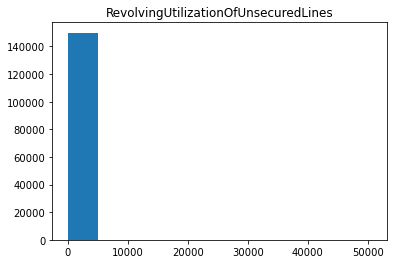

False    150000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64


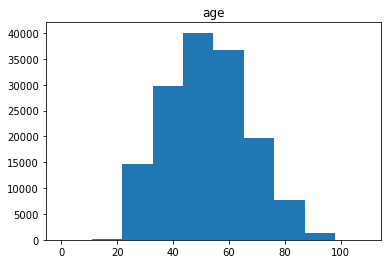

False    150000
Name: age, dtype: int64


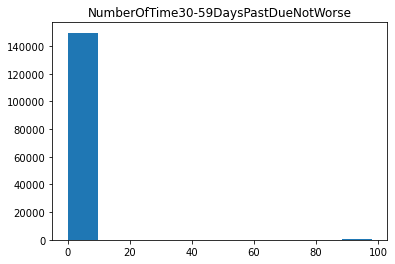

False    150000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64


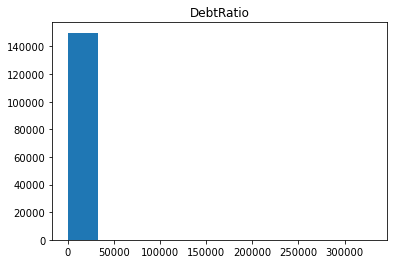

False    150000
Name: DebtRatio, dtype: int64


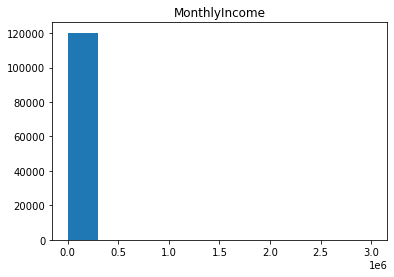

False    120269
True      29731
Name: MonthlyIncome, dtype: int64


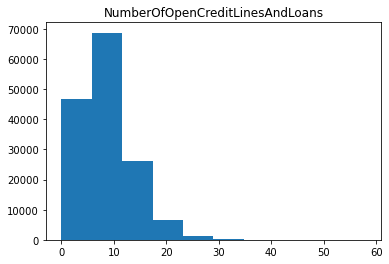

False    150000
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64


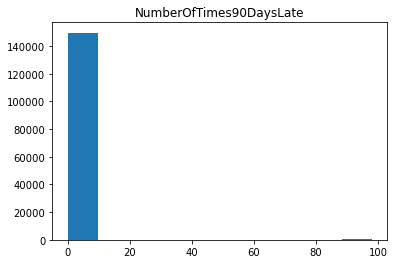

False    150000
Name: NumberOfTimes90DaysLate, dtype: int64


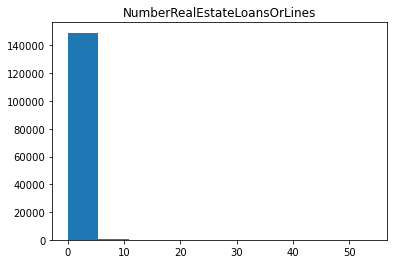

False    150000
Name: NumberRealEstateLoansOrLines, dtype: int64


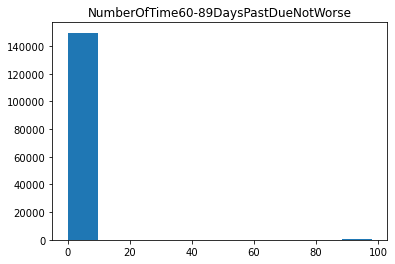

False    150000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64


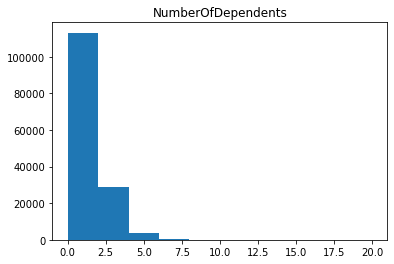

False    146076
True       3924
Name: NumberOfDependents, dtype: int64


In [19]:
print(y_train.sum() / y_train.shape[0], "% positive labels")

for feat in X_train.columns:
    print("=================")
    plt.title(feat)
    plt.hist(X_train[feat])
    plt.show()
    print(pd.isna(X_train[feat]).value_counts())

<AxesSubplot:>

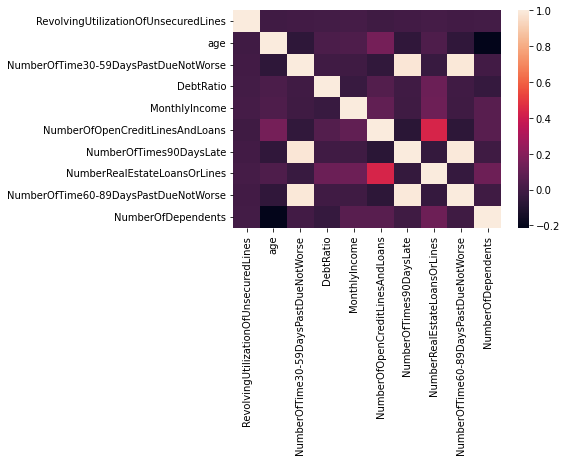

In [29]:
sns.heatmap(X_train.corr())

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
# model = sklearn.ensemble.GradientBoostingClassifier(random_state=42)




# model = xgb.XGBClassifier(random_state=42)
# model = MLPClassifier(random_state=42)

#model = RandomizedSearchCV(xgb, param_distributions=TRAIN_CONFIGS["model_params"], n_iter=400, scoring='roc_auc', n_jobs=-1, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state = 0), verbose=3, random_state=0)
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

model = RandomizedSearchCV(xgb.XGBClassifier(), \
    param_distributions=params,
    n_iter=100, 
    scoring='roc_auc', 
    cv=StratifiedKFold(n_splits=5, \
        shuffle = True, 
        random_state = 0), 
    verbose=3,
    n_jobs=-1, 
    random_state=0)
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc", )
# print(np.mean(cv_scores))


# 5 CV performance
# 0.859     raw data
# 0.859     0.01 lower clip
# 0.858     0.99 upper clip
# 0.858     0.01 lower 0.99 upper clip
# 0.8595    standardization






In [22]:

model.fit(X_train, y_train)
test_pred = model.predict_proba(X_test)

# print(test_pred.shape)
# print(np.arange(len(test_pred)).shape)
submission_dict = {
    "Id": np.arange(1, len(test_pred) + 1),
    "Probability": test_pred[:, 1]
}
submission_df = pd.DataFrame(submission_dict)

submission_df.to_csv("submission.csv", index=False)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.859 total time=  17.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.860 total time=  17.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.860 total time=  17.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.868 total time=  17.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.860 total time=  17.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.865 total time=  17.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.864 total time=  17.6s
[CV 2/5] END colsample_by

In [23]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [24]:
best_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=7,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)